## 1. Import the data

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
data = pd.read_csv("parkinsons.csv")

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%) , MDVP:Jitter(Abs) , MDVP:RAP , MDVP:PPQ , Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer , MDVP:Shimmer(dB) , Shimmer:APQ3 , Shimmer:APQ5 , MDVP:APQ , Shimmer:DDA - Several measures of variation in amplitude

NHR , HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE , D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1 , spread2 , PPE - Three nonlinear measures of fundamental frequency variation

## 2. EDA

In [5]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
data.shape

(195, 24)

In [8]:
data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [9]:
X = data.drop(['name', 'status'], axis=1)
y = data['status']

In [10]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [11]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [12]:
numeric_df = data.select_dtypes(include='number')

C:\Users\USER\AppData\Local\Temp\ipykernel_2488\1901230099.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=numeric_df, palette='Set2')


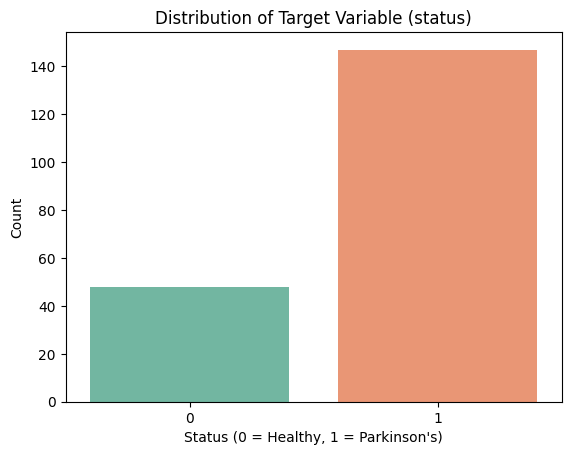

In [13]:
sns.countplot(x='status', data=numeric_df, palette='Set2')
plt.title("Distribution of Target Variable (status)")
plt.xlabel("Status (0 = Healthy, 1 = Parkinson's)")
plt.ylabel("Count")
plt.show()

This bar plot visualizes the distribution of the target variable, where 0 represents healthy individuals and 1 represents those with Parkinson's disease.
It shows a class imbalance, with significantly more samples labeled as Parkinson's patients than healthy ones.
Understanding this imbalance is essential for model evaluation and may call for strategies like resampling or class weighting.

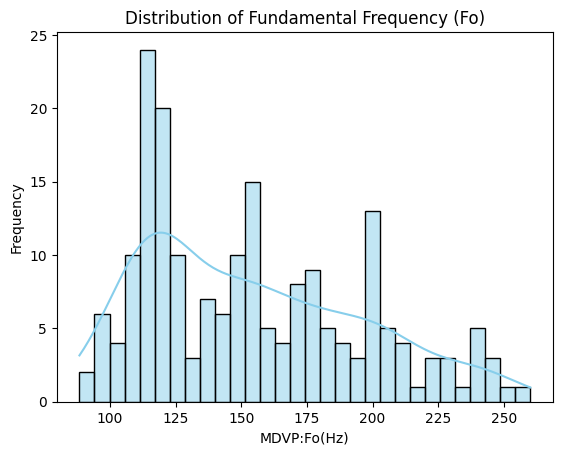

In [14]:
sns.histplot(numeric_df['MDVP:Fo(Hz)'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Fundamental Frequency (Fo)")
plt.xlabel("MDVP:Fo(Hz)")
plt.ylabel("Frequency")
plt.show()

This histogram shows the distribution of the average fundamental frequency (MDVP:Fo) across all samples.
The distribution is right-skewed, indicating that most voices have a lower pitch, with a few having higher frequencies.
Such pitch variations may help distinguish between Parkinson’s patients and healthy individuals.

C:\Users\USER\AppData\Local\Temp\ipykernel_2488\4137016439.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y='MDVP:Jitter(%)', data=numeric_df, palette='Set3')


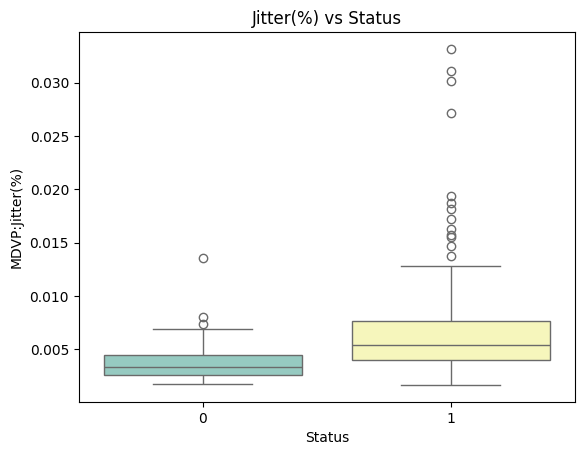

In [15]:
sns.boxplot(x='status', y='MDVP:Jitter(%)', data=numeric_df, palette='Set3')
plt.title("Jitter(%) vs Status")
plt.xlabel("Status")
plt.ylabel("MDVP:Jitter(%)")
plt.show()


The boxplot compares voice jitter percentage (MDVP:Jitter(%)) between healthy individuals and those with Parkinson’s.
Parkinson's patients tend to have higher jitter values, indicating more irregularity in vocal cord vibration.
This feature appears to be a strong indicator of Parkinson’s and could be important for classification.

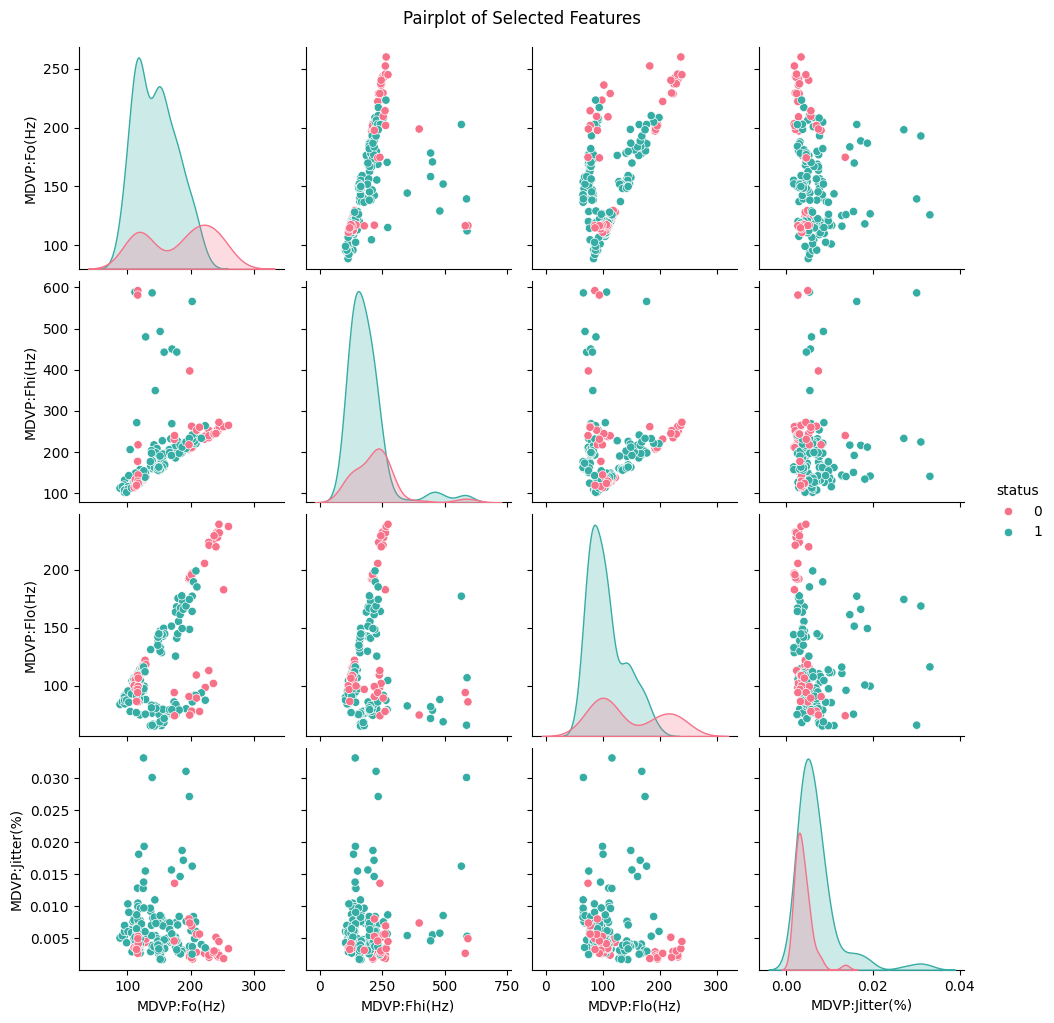

In [16]:
selected_features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'status']
sns.pairplot(numeric_df[selected_features], hue='status', palette='husl')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

This pairplot visualizes relationships between selected features (Fo, Fhi, Flo, Jitter) and the target variable.
It reveals clear clustering between the two classes across multiple dimensions, especially in Fhi and Jitter.
This visualization helps in identifying feature interactions and separability for model training.

## 3. Data preprocessing

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [19]:
print(y.shape, Y_train.shape, Y_test.shape)

(195,) (156,) (39,)


In [20]:
scalar = StandardScaler()

In [21]:
scalar.fit(X_train)

StandardScaler()

In [22]:
scalar.transform(X_train)
scalar.transform(X_test)

array([[-1.00094234e+00, -7.61129656e-01, -3.33430899e-01,
        -2.67903948e-01, -8.37831615e-02, -2.73907813e-01,
        -1.79605186e-01, -2.72956229e-01,  1.32697546e+00,
         1.11619250e+00,  1.39922326e+00,  1.33789355e+00,
         1.11666351e+00,  1.39955044e+00,  2.45567692e-02,
        -9.70699528e-01,  1.37623734e+00, -3.79194673e-01,
         1.03265999e-01,  9.81854292e-01,  1.08879298e-01,
         6.45664184e-02],
       [-2.35313090e-01,  1.82208595e+00, -8.33907977e-01,
        -1.29884631e-01, -8.37831615e-02, -3.58316629e-01,
        -1.72916619e-01, -3.59448257e-01, -4.85428396e-01,
        -4.57177156e-01, -5.78173628e-01, -4.91503147e-01,
        -2.07346547e-01, -5.77873985e-01, -1.53075359e-01,
         7.97915644e-02,  6.78106615e-01, -1.41732622e+00,
         2.78051185e-01,  1.82290931e-01, -2.86408969e-01,
         1.60299391e-01],
       [-8.66000457e-01, -7.52544075e-01, -5.31477264e-01,
         6.75596690e-02,  1.86820838e-01,  9.49899789e-02,
    

## 4. Models

### 4.1 Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=42, max_iter=1000)

In [24]:
log.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [25]:
log_pred = log.predict(X_test)
log_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [26]:
print(accuracy_score(Y_test, log_pred))

0.8974358974358975


In [27]:
print(confusion_matrix(Y_test, log_pred))

[[ 3  4]
 [ 0 32]]


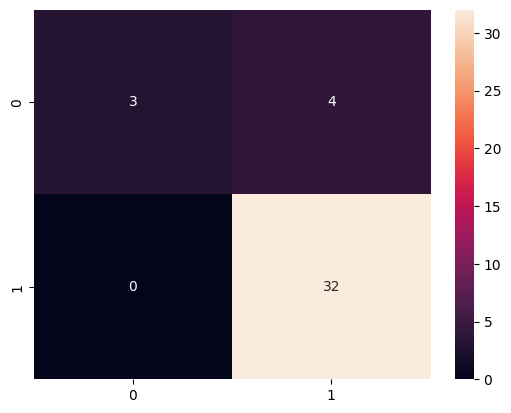

In [28]:
sns.heatmap(confusion_matrix(Y_test, log_pred), fmt='.0f', annot=True)
plt.show()

### 4.2 SVM

In [29]:
model = svm.SVC(kernel = 'linear')

In [30]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [31]:
train_prediction = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, train_prediction)

In [32]:
print(f"Accuracy of train: {train_accuracy}")

Accuracy of train: 0.8653846153846154


In [33]:
svm_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, svm_pred)

In [34]:
print(f"Accuracy of test", {test_accuracy})

Accuracy of test {0.8717948717948718}


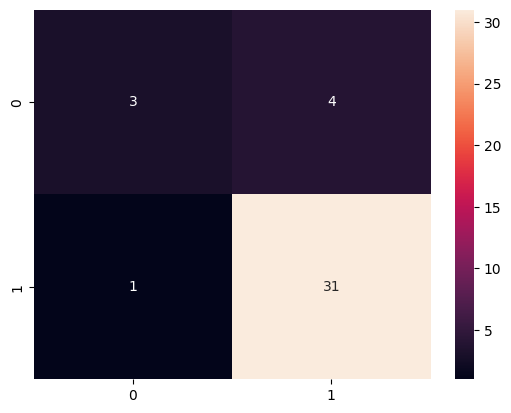

In [35]:
sns.heatmap(confusion_matrix(Y_test, svm_pred), fmt='.0f', annot=True)
plt.show()

### 4.3 KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
neighbour = KNeighborsClassifier()

In [38]:
neighbour.fit(X_train, Y_train)

KNeighborsClassifier()

In [39]:
neighbour_pred = model.predict(X_test)
neighbour_test_accuracy = accuracy_score(Y_test, neighbour_pred)

In [40]:
print(neighbour_test_accuracy)

0.8717948717948718


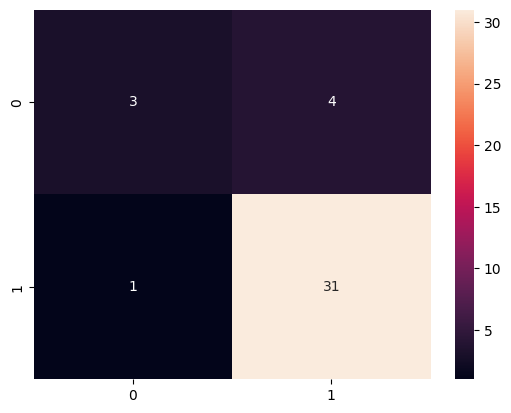

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

sns.heatmap(confusion_matrix(Y_test, neighbour_pred), fmt='.0f', annot=True)
plt.show()

### 4.4 Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)

In [43]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
tree_pred = tree.predict(X_test)
tree_test_accuracy = accuracy_score(Y_test, tree_pred)

In [45]:
print(f"Decision Tree Accuracy:", tree_test_accuracy)

Decision Tree Accuracy: 0.9230769230769231


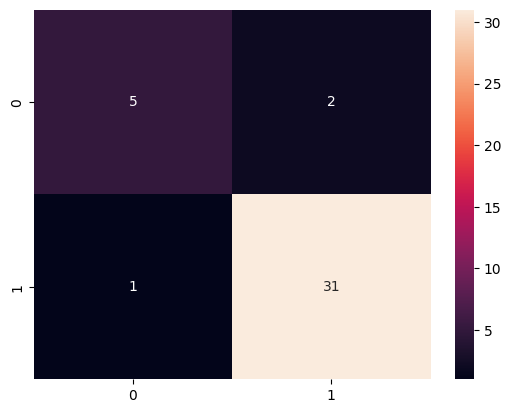

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

sns.heatmap(confusion_matrix(Y_test, tree_pred), fmt='.0f', annot=True)
plt.show()

### 4.5 Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [48]:
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [49]:
rf_preds = rf.predict(X_test)
rf_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [50]:
accuracy = accuracy_score(Y_test, rf_preds)
print(accuracy)

0.9487179487179487


In [51]:
print(confusion_matrix(Y_test, rf_preds))

[[ 5  2]
 [ 0 32]]


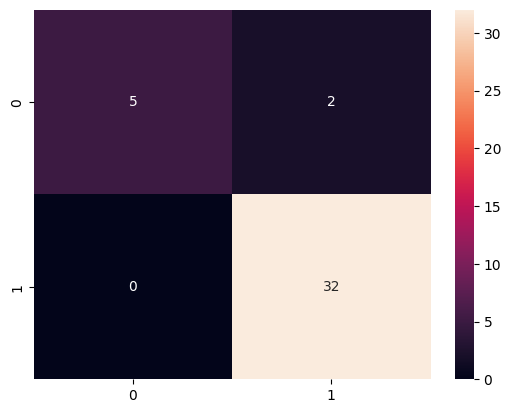

In [52]:
sns.heatmap(confusion_matrix(Y_test, rf_preds), fmt='.0f', annot=True)
plt.show()

### 4.6 XGBoost

In [56]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)

In [57]:
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [58]:
xgb_pred = xgb.predict(X_test)
xgb_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [59]:
print(confusion_matrix(Y_test, xgb_pred))

[[ 5  2]
 [ 0 32]]


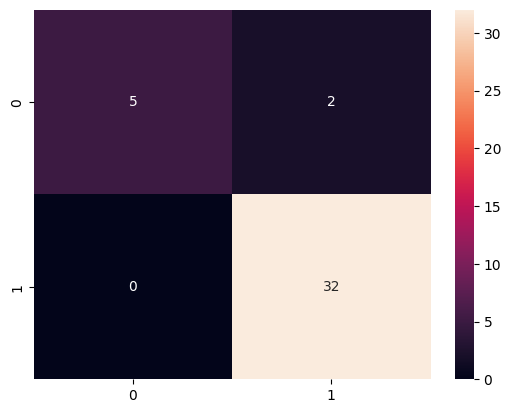

In [60]:
sns.heatmap(confusion_matrix(Y_test, xgb_pred), annot=True, fmt='.0f')
plt.show()

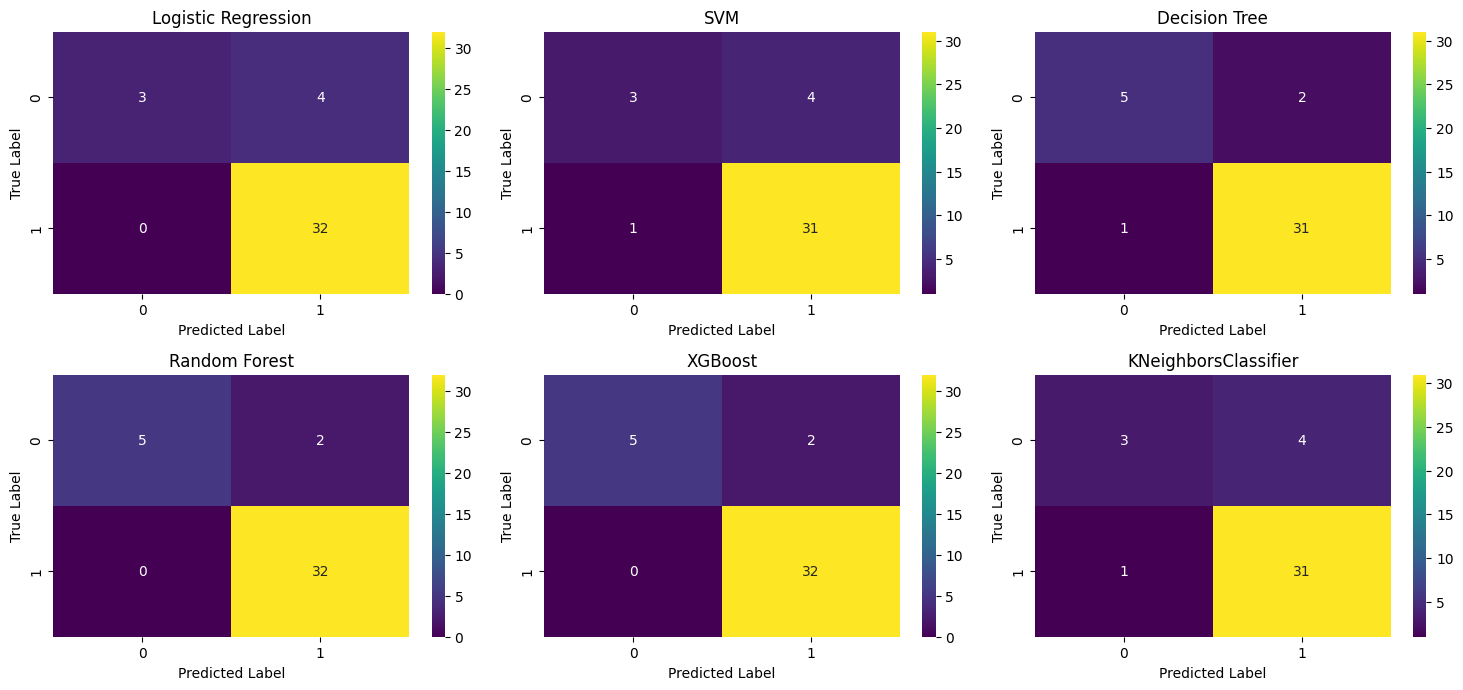

In [61]:
models_pred = {
    "Logistic Regression": log_pred,
    "SVM": svm_pred,
    "Decision Tree": tree_pred,
    "Random Forest": rf_preds,
    "XGBoost": xgb_pred,
    "KNeighborsClassifier": neighbour_pred
}

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for i, (name, pred) in enumerate(models_pred.items()):
    cm = confusion_matrix(Y_test, pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', ax=axes.flatten()[i])
    
    axes.flatten()[i].set_title(name)
    axes.flatten()[i].set_xlabel('Predicted Label')
    axes.flatten()[i].set_ylabel('True Label')

for j in range(i+1, 9):  
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [62]:
from sklearn.metrics import classification_report

models_pred = {
    "Logistic Regression": log_pred,
    "SVM": svm_pred,
    "Decision Tree": tree_pred,
    "Random Forest": rf_preds,
    "XGBoost": xgb_pred,
    "KNeighborsClassifier": neighbour_pred
}

for name, pred in models_pred.items():
    print(f"=== {name} ===")
    print(classification_report(Y_test, pred))
    print("\n")


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



=== SVM ===
              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.89      0.97      0.93        32

    accuracy                           0.87        39
   macro avg       0.82      0.70      0.74        39
weighted avg       0.86      0.87      0.86        39



=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted

In [63]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

models_pred = {
    "Logistic Regression": log_pred,
    "SVM": svm_pred,
    "Decision Tree": tree_pred,
    "Random Forest": rf_preds,
    "XGBoost": xgb_pred,
    "KNeighborsClassifier": neighbour_pred
}

results = []

for name, pred in models_pred.items():
    acc = accuracy_score(Y_test, pred)
    f1 = f1_score(Y_test, pred, pos_label=1)  
    results.append({
        "Model": name,
        "Accuracy": round(acc, 2),
        "F1-score (Class 1)": round(f1, 2)
    })

results_df = pd.DataFrame(results)

print(results_df)

                  Model  Accuracy  F1-score (Class 1)
0   Logistic Regression      0.90                0.94
1                   SVM      0.87                0.93
2         Decision Tree      0.92                0.95
3         Random Forest      0.95                0.97
4               XGBoost      0.95                0.97
5  KNeighborsClassifier      0.87                0.93


In [ ]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import pickle


df = pd.read_csv("parkinsons.csv")

features = ['MDVP:Jitter(%)', 'MDVP:Shimmer', 'NHR', 'HNR', 'RPDE']
X = df[features]
y = df['status'] 


model = RandomForestClassifier()
model.fit(X, y)


with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
